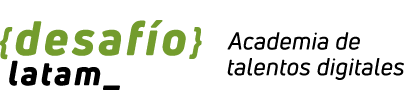

#<center><font color = 'green'>Solución Desafío - Enfermedad en la sangre</font></center>

1. Importación de librerías y preparación de datos

In [1]:
#!pip install xgboost

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegressionCV
from xgboost import XGBRFClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler


In [2]:
df = pd.read_csv('hcvdat0.csv')
df = df.drop(columns='Unnamed: 0', axis=1)
print(df.shape)
df.head()


(615, 13)


,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


In [3]:
df['target'] = np.where(df['Category'] == '0=Blood Donor', 0, 1)
df['Sex'] = df['Sex'].replace({'m': 1, 'f': 0})
df['suspect'] = np.where(df['Category'] == '0s=suspect Blood Donor', 1, 0)
df = df.drop(columns='Category', axis=1)

df.head()


,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT,target,suspect
0,32,1,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0,0,0
1,32,1,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5,0,0
2,32,1,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3,0,0
3,32,1,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7,0,0
4,32,1,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7,0,0


In [4]:
df.isnull().sum()

Age         0
Sex         0
ALB         1
ALP        18
ALT         1
AST         0
BIL         0
CHE         0
CHOL       10
CREA        0
GGT         0
PROT        1
target      0
suspect     0
dtype: int64

In [5]:
# los que tengas una cantidad de valores ausentes menores
# al percent_drop% se elimina la fila completa
percent_drop = 0.01
percent_na = df.isnull().sum()/df.shape[0]
df = df.dropna(subset=list(percent_na[percent_na < percent_drop].index))

cols = list(percent_na[percent_na >= percent_drop].index)
df_ = df.drop(columns=cols).reset_index(drop=True)
cols.append('target')

df_temp = df.loc[:,cols].groupby('target').apply(lambda group: group.fillna(group.mean())).reset_index(drop=True)
df = pd.concat([df_.drop(columns='target', axis=1), df_temp], axis=1)

df.head()


<ipython-input-5-df49a21caca8>:11: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df_temp = df.loc[:,cols].groupby('target').apply(lambda group: group.fillna(group.mean())).reset_index(drop=True)


,Age,Sex,ALB,ALT,AST,BIL,CHE,CREA,GGT,PROT,suspect,ALP,CHOL,target
0,32,1,38.5,7.7,22.1,7.5,6.93,106.0,12.1,69.0,0,52.5,3.23,0
1,32,1,38.5,18.0,24.7,3.9,11.17,74.0,15.6,76.5,0,70.3,4.80,0
2,32,1,46.9,36.2,52.6,6.1,8.84,86.0,33.2,79.3,0,74.7,5.20,0
3,32,1,43.2,30.6,22.6,18.9,7.33,80.0,33.8,75.7,0,52.0,4.74,0
4,32,1,39.2,32.6,24.8,9.6,9.15,76.0,29.9,68.7,0,74.1,4.32,0


In [6]:
X = df.drop(columns=['target', 'suspect'], axis=1)  # Ajusta las columnas según tus necesidades
y = df['target']

# se separa los conjunto en entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.33, random_state=23)


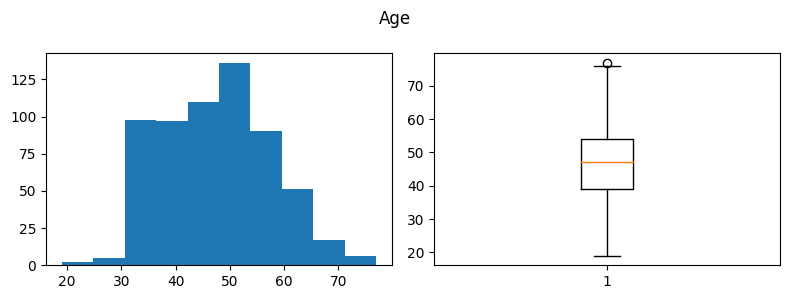

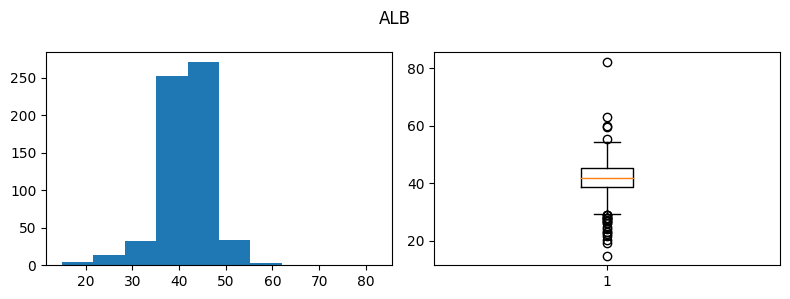

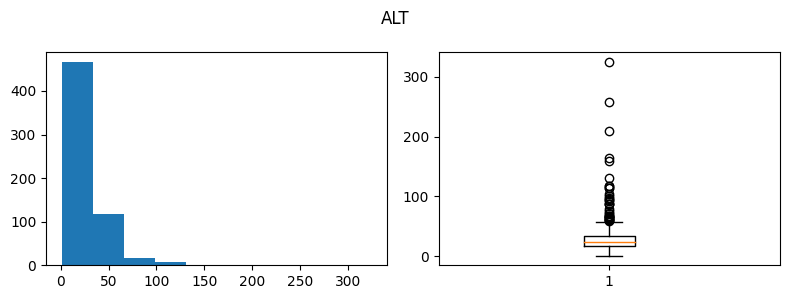

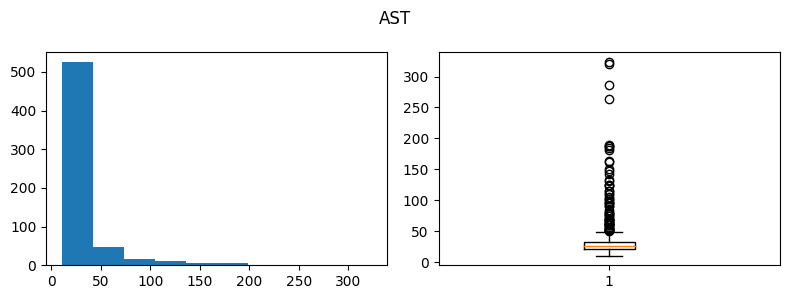

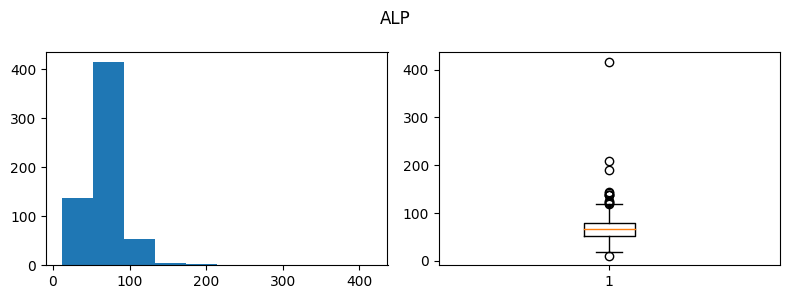

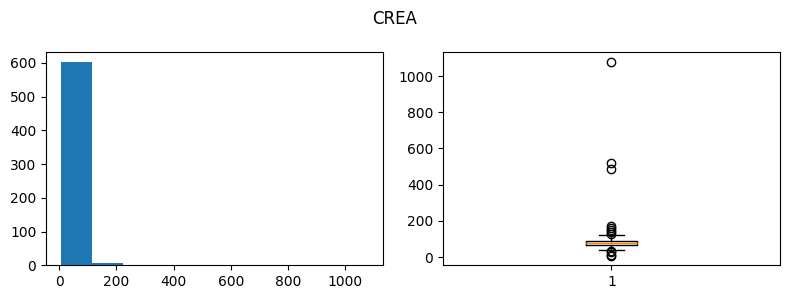

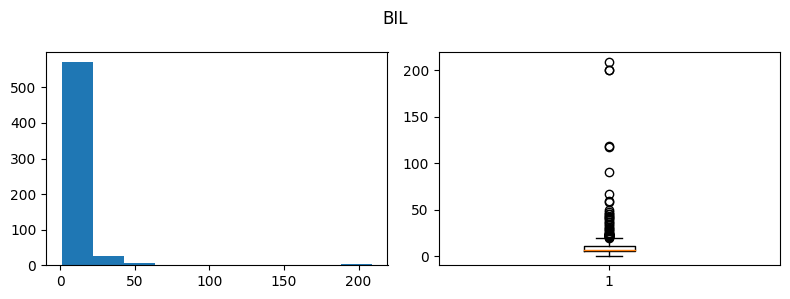

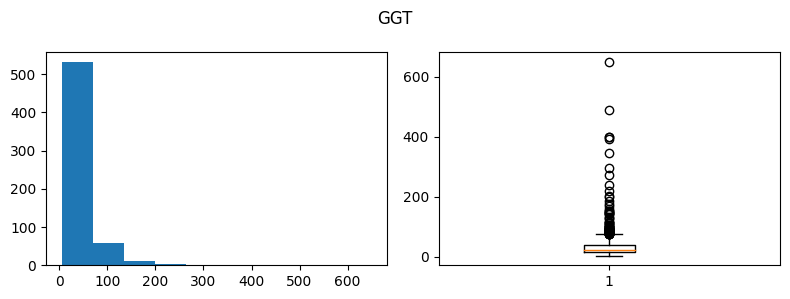

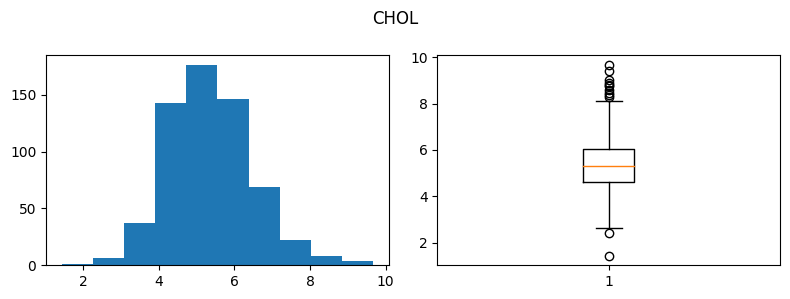

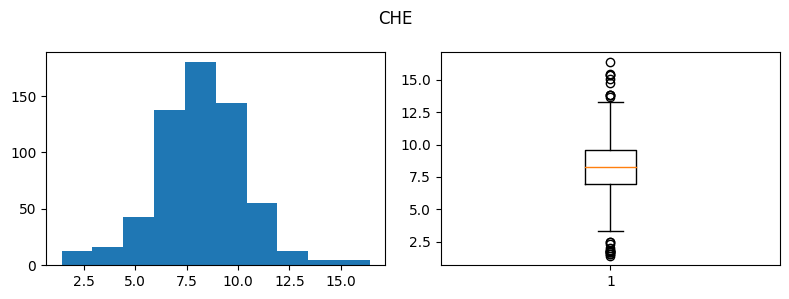

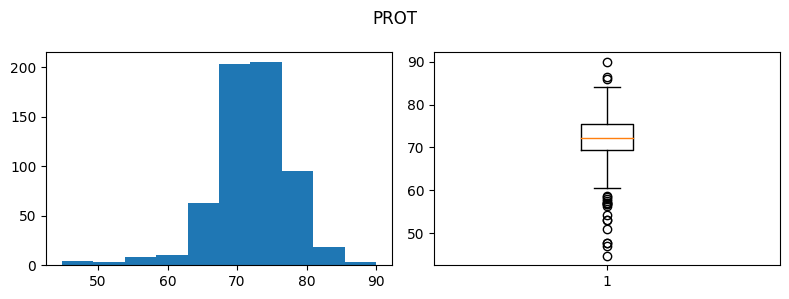

In [8]:
def plot_aux(serie, nombre):
    # Verificar y reemplazar los valores NaN con ceros
    serie = serie.fillna(0)

    fig, ax = plt.subplots(1, 2, figsize=(8, 3))

    # Graficar el histograma sin densidad
    ax[0].hist(serie, density=False)

    # Graficar el boxplot
    ax[1].boxplot(serie)

    plt.suptitle(nombre)
    plt.tight_layout()

# Suponiendo que df es tu DataFrame y quieres graficar todas las columnas excepto 'target', 'Sex_m' y 'suspect'
for v in set(df.columns) - set(['target', 'Sex', 'suspect']):
    try:
        plot_aux(df[v], v)
    except Exception as e:
        print(f"Error plotting {v}: {e}")

plt.show()


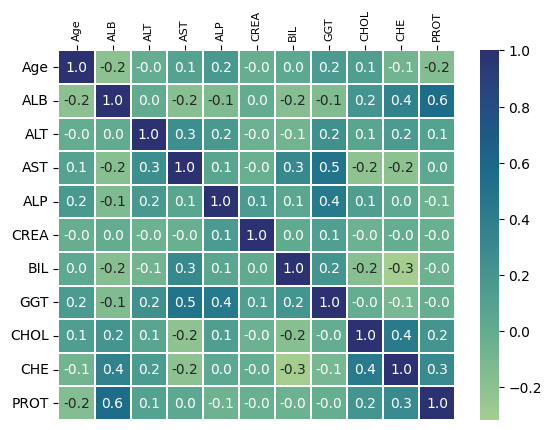

In [9]:
continued_var = list(set(df.columns) - set(['target', 'suspect', 'Sex']))
ax = sns.heatmap(df.loc[:,continued_var].corr(), annot=True, linecolor='white', linewidths=0.25, cmap='crest', fmt='.1f')
ax.xaxis.tick_top()
plt.tick_params(axis='x', labelrotation=90, labelsize=8)


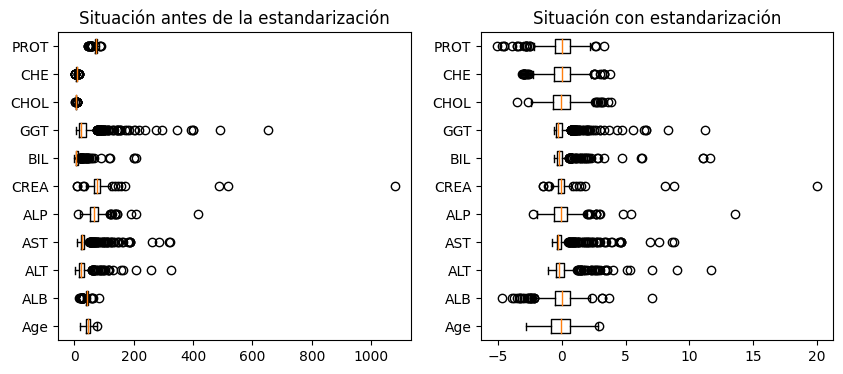

In [10]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))
ax[0].boxplot(df.loc[:,continued_var], vert=False)
ax[0].set_yticks(np.arange(1, len(continued_var)+1), continued_var)
ax[0].set_title('Situación antes de la estandarización')

X = df.drop(columns=['target'], axis=1)
y = df['target']

sscaler_model = StandardScaler()
sscaler_model.fit(X)
X = pd.DataFrame(sscaler_model.transform(X), columns=X.columns)

ax[1].boxplot(X.loc[:, continued_var], vert=False)
ax[1].set_yticks(np.arange(1, len(continued_var)+1), continued_var)
ax[1].set_title('Situación con estandarización');


In [11]:
# separación de la muestra entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.33, random_state=23)


2. Desarrolla un modelo regresión logística con validación cruzada usando 5-fold, con regularización Elastic Net.

In [12]:
%%time
'''
l1_ratios = 0 -> l2
l1_ratios = 1 -> l1
'''

Cs = list(np.linspace(0.01, 5.0, 200))
l1_ratios = list(np.linspace(0, 1, 200, dtype=float))

logistic_model_enet = LogisticRegressionCV(cv=5, solver='saga',
    max_iter=10000,
    penalty='elasticnet',
    Cs=Cs,
    l1_ratios=l1_ratios,
    n_jobs=-1
)

logistic_model_enet.fit(X_train, y_train)
yhat_test = logistic_model_enet.predict(X_test)

print('Test')
print(classification_report(y_test, yhat_test))
print()


Test
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       183
           1       0.94      0.79      0.86        19

    accuracy                           0.98       202
   macro avg       0.96      0.89      0.92       202
weighted avg       0.97      0.98      0.97       202


CPU times: user 23min 19s, sys: 6.44 s, total: 23min 26s
Wall time: 14min 5s


In [1]:
import numpy as np
Cs = list(np.linspace(0.01, 5.0, 200))

In [2]:
Cs

[0.01,
 0.03507537688442211,
 0.060150753768844226,
 0.08522613065326633,
 0.11030150753768844,
 0.13537688442211057,
 0.16045226130653267,
 0.1855276381909548,
 0.2106030150753769,
 0.235678391959799,
 0.26075376884422113,
 0.28582914572864326,
 0.31090452261306534,
 0.33597989949748747,
 0.3610552763819096,
 0.38613065326633167,
 0.4112060301507538,
 0.4362814070351759,
 0.461356783919598,
 0.48643216080402013,
 0.5115075376884423,
 0.5365829145728643,
 0.5616582914572865,
 0.5867336683417086,
 0.6118090452261307,
 0.6368844221105529,
 0.6619597989949749,
 0.687035175879397,
 0.7121105527638192,
 0.7371859296482413,
 0.7622613065326633,
 0.7873366834170855,
 0.8124120603015076,
 0.8374874371859297,
 0.8625628140703518,
 0.8876381909547739,
 0.912713567839196,
 0.9377889447236182,
 0.9628643216080403,
 0.9879396984924623,
 1.0130150753768845,
 1.0380904522613066,
 1.0631658291457287,
 1.0882412060301507,
 1.113316582914573,
 1.138391959798995,
 1.1634673366834172,
 1.1885427135678392,

Muestra los valores óptimos encontrados, y las métricas precisión, recall, f1-score y accuracy. Describe cuáles son las tres características con mayor incidencia en la predicción de sujeto o muestra con sangre con posible enfermedad.

In [ ]:
# Mostrar los valores óptimos y los coeficientes asociados a los atributos
print(f'C={logistic_model_enet.C_}')
print(f'l1_ratio={logistic_model_enet.l1_ratio_}')

print()
for aux in zip(logistic_model_enet.feature_names_in_,logistic_model_enet.coef_.ravel() ):
    print(aux)


C=[0.93778894]
l1_ratio=[0.21105528]

('Age', -0.13939671834816694)
('Sex', -0.27723117959674753)
('ALB', -0.8330980009454095)
('ALT', -0.06702070564252417)
('AST', 1.5740892450510662)
('BIL', 0.972583476766551)
('CHE', 0.11875310052378402)
('CREA', 0.8961589956999005)
('GGT', 1.7751961748704295)
('PROT', 0.8450696480168415)
('suspect', 1.0824142126884624)
('ALP', -1.4343266661238905)
('CHOL', -0.8572424144836298)


3. Implementa un modelo Extreme Gradient Boosting con búsqueda de hiper parámetros de grilla, con regularización para la combinación L1 y L2.

Ojo: el próximo código tomó 3 horas en ejecutarse

In [ ]:
%%time
param_grid = {
    'reg_lambda': np.linspace(0.0, 2, 10, dtype=float), # l2
    'reg_alpha': np.linspace(0.0, 2, 10, dtype=float), # l1
    'learning_rate': np.linspace(0.1, 10, 20, dtype=float)
}
grid_xgb = GridSearchCV(XGBRFClassifier(), param_grid=param_grid, cv=5, n_jobs=-1)
grid_xgb.fit(X_train, y_train)

CPU times: user 9min 31s, sys: 30.9 s, total: 10min 2s
Wall time: 3h 1min 21s


GridSearchCV(cv=5,
             estimator=XGBRFClassifier(base_score=None, booster=None,
                                       callbacks=None, colsample_bylevel=None,
                                       colsample_bytree=None, device=None,
                                       early_stopping_rounds=None,
                                       enable_categorical=False,
                                       eval_metric=None, feature_types=None,
                                       gamma=None, grow_policy=None,
                                       importance_type=None,
                                       interaction_constraints=None,
                                       max_bin=None, max_cat_threshold=None,
                                       max...
       0.52631579, 0.63157895, 0.73684211, 0.84210526, 0.94736842,
       1.05263158, 1.15789474, 1.26315789, 1.36842105, 1.47368421,
       1.57894737, 1.68421053, 1.78947368, 1.89473684, 2.        ]),
                         'reg_lambda': array([0.        , 0.10526316, 0.21052632, 0.31578947, 0.42105263,
       0.52631579, 0.63157895, 0.73684211, 0.84210526, 0.94736842,
       1.05263158, 1.15789474, 1.26315789, 1.36842105, 1.47368421,
       1.57894737, 1.68421053, 1.78947368, 1.89473684, 2.        ])})

In [ ]:
print('Mejores parámetros:')
print(grid_xgb.best_params_)
print()


Mejores parámetros:
{'learning_rate': 0.9, 'reg_alpha': 0.42105263157894735, 'reg_lambda': 0.631578947368421}



In [ ]:
yhat_test = grid_xgb.best_estimator_.predict(X_test)

print('Test')
print(classification_report(y_test, yhat_test))
print()


Test
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       183
           1       0.83      0.79      0.81        19

    accuracy                           0.97       202
   macro avg       0.91      0.89      0.90       202
weighted avg       0.96      0.97      0.96       202




4. Muestra el nivel de importancia de los atributos,  los valores óptimos de los hiper parámetros y las métricas precisión, recall, f1-score y accuracy. Compara los resultados de este modelo con el de regresión logística.

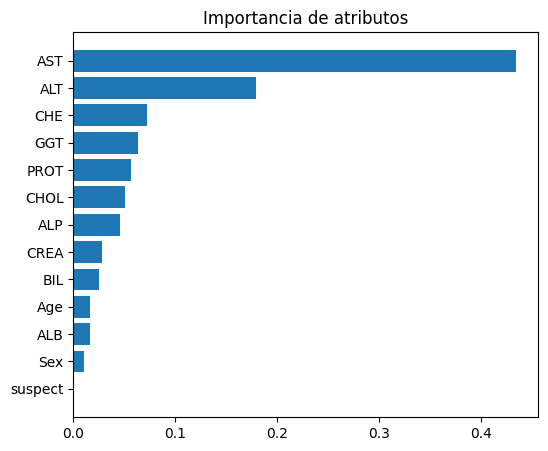

In [ ]:
df_im = pd.DataFrame({
    'feature': grid_xgb.best_estimator_.feature_names_in_,
    'importance': grid_xgb.best_estimator_.feature_importances_
}).sort_values(by='importance', ascending=True)

fig, ax = plt.subplots(figsize=(6, 5))
ax.barh(y=df_im['feature'], width=df_im['importance'])
ax.set_title('Importancia de atributos')
plt.show()
